# Proyek Analisis Data : Bike Sharing Dataset
- Nama : Idha Kurniawati
- Email : idhakurniawati03@gmail.com
- ID Dicoding : idhakt

## Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

#### **Data Set**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 



#### **Dataset characteristics:**
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi lingkungan dan musim terhadap jumlah penyewaan sepeda?
- Bagaimana perbedaan pola penyewaan sepeda pada hari kerja, akhir pekan, dan hari libur?
- Bagaimana tren penyewaan sepeda berdasarkan waktu dalam sehari? 

## Menyiapkan Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel days

In [2]:
days_df = pd.read_csv('data\data_1.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hours

In [3]:
hours_df = pd.read_csv('data\data_2.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

**Menilai Data days_df**

In [4]:
# Memeriksa tipe data dari tiap kolom
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil di atas, jumlah data pada tabel days_df lengkap. Akan tetapi, terdapat kesalahan tipe data pada kolom *dteday*. Seharusnya kolom *dteday* bertipe data datetime. Selain itu, kolom *season*, *yr*, *mnth*, *holiday*, *weekday*, *workingday*, dan *weathersit* memerlukan konversi tipe data menjadi categorigal agar lebih mudah dianalisis dan dipahami.

In [5]:
# Menampilkan jumlah missing values yang terdapat dalam setiap kolom
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil di atas, tidak ditemukan missing values pada tabel days_df.

In [6]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil di atas, tidak ditemukan duplikasi data pada tabel days_df.

In [7]:
# Memeriksa parameter statistik
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil di atas, tidak terdapat keanehan dalam tabel days_df

**Menilai Data hours_df**

In [8]:
# Memeriksa tipe data dari tiap kolom
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil di atas, jumlah data pada tabel hours_df lengkap. Akan tetapi, terdapat kesalahan tipe data pada kolom *dteday*. Seharusnya kolom *dteday* bertipe data datetime. Selain itu, kolom *season*, *yr*, *mnth*, *hr*, *holiday*, *weekday*, *workingday*, dan *weathersit* memerlukan konversi tipe data menjadi categorigal agar lebih mudah dianalisis dan dipahami.

In [9]:
# Menampilkan jumlah missing values yang terdapat dalam setiap kolom
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil di atas, tidak terdapat missing values pada tabel hours_df

In [10]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil di atas, tidak terdapat duplikasi data pada tabel hours_df

In [11]:
# Memeriksa parameter statistik
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil di atas, tidak terdapat keanehan dalam tabel hours_df

### Cleaning Data

**Membersihkan Data days_df**

In [12]:
# mengubah tipe data dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
    days_df[column] = pd.to_datetime(days_df[column])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
# mengubah tipe data season, yr, mnth, holiday, weekday, workingday, dan weathersit
days_df['season'] = days_df['season'].astype('category')
days_df['yr'] = days_df['yr'].astype('category')
days_df['mnth'] = days_df['mnth'].astype('category')
days_df['holiday'] = days_df['holiday'].astype('category')
days_df['weekday'] = days_df['weekday'].astype('category')
days_df['workingday'] = days_df['workingday'].astype('category')
days_df['weathersit'] = days_df['weathersit'].astype('category')

print(days_df.dtypes)

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [14]:
# Menampilkan jumlah kategori untuk setiap kolom yang dikonversi
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in columns:
    num_categories = days_df[col].nunique()
    print(f"Jumlah kategori di kolom '{col}': {num_categories}")

Jumlah kategori di kolom 'season': 4
Jumlah kategori di kolom 'yr': 2
Jumlah kategori di kolom 'mnth': 12
Jumlah kategori di kolom 'holiday': 2
Jumlah kategori di kolom 'weekday': 7
Jumlah kategori di kolom 'workingday': 2
Jumlah kategori di kolom 'weathersit': 3


In [15]:
# Menampilkan kategori dalam setiap kolom
for col in columns:
    categories = days_df[col].cat.categories
    print(f"Kategori dalam kolom '{col}': {list(categories)}\n")

Kategori dalam kolom 'season': [1, 2, 3, 4]

Kategori dalam kolom 'yr': [0, 1]

Kategori dalam kolom 'mnth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Kategori dalam kolom 'holiday': [0, 1]

Kategori dalam kolom 'weekday': [0, 1, 2, 3, 4, 5, 6]

Kategori dalam kolom 'workingday': [0, 1]

Kategori dalam kolom 'weathersit': [1, 2, 3]



In [16]:
# Menambahkan label kategori untuk kolom season
days_df['season'] = days_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Menambahkan label kategori untuk kolom yr
days_df['yr'] = days_df['yr'].cat.rename_categories({0: '2011', 1: '2012'})

# Menambahkan label kategori untuk kolom mnth
days_df['mnth'] = days_df['mnth'].cat.rename_categories({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Menambahkan label kategori untuk kolom holiday
days_df['holiday'] = days_df['holiday'].cat.rename_categories({0: 'Non-Holiday', 1: 'Holiday'})

# Menambahkan label kategori untuk kolom weeksay
days_df['weekday'] = days_df['weekday'].cat.rename_categories({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Menambahkan label kategori untuk kolom workingday
days_df['workingday'] = days_df['workingday'].cat.rename_categories({0: 'Non-Working Day', 1: 'Working Day'})

# Menambahkan label kategori untuk kolom weathersit
days_df['weathersit'] = days_df['weathersit'].cat.rename_categories({
    1: 'Clear/Few clouds/Partly cloudy',
    2: 'Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist',
    3: 'Light Snow/Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist/Snow + Fog'
})

In [17]:
# Menampilkan kategori dalam setiap kolom
for col in columns:
    categories = days_df[col].cat.categories
    print(f"Kategori dalam kolom '{col}': {list(categories)}\n")

Kategori dalam kolom 'season': ['Spring', 'Summer', 'Fall', 'Winter']

Kategori dalam kolom 'yr': ['2011', '2012']

Kategori dalam kolom 'mnth': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Kategori dalam kolom 'holiday': ['Non-Holiday', 'Holiday']

Kategori dalam kolom 'weekday': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

Kategori dalam kolom 'workingday': ['Non-Working Day', 'Working Day']

Kategori dalam kolom 'weathersit': ['Clear/Few clouds/Partly cloudy', 'Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist', 'Light Snow/Light Rain + Thunderstorm + Scattered clouds']



In [18]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Non-Holiday,Sunday,Non-Working Day,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Non-Holiday,Monday,Working Day,Clear/Few clouds/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Non-Holiday,Tuesday,Working Day,Clear/Few clouds/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Non-Holiday,Wednesday,Working Day,Clear/Few clouds/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Membersihkan Data hours_df**

In [19]:
# mengubah tipe data dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
    hours_df[column] = pd.to_datetime(hours_df[column])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
# Mengubah tipe data season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit
hours_df['season'] = hours_df['season'].astype('category')
hours_df['yr'] = hours_df['yr'].astype('category')
hours_df['mnth'] = hours_df['mnth'].astype('category')
hours_df['hr'] = hours_df['hr'].astype('category')
hours_df['holiday'] = hours_df['holiday'].astype('category')
hours_df['weekday'] = hours_df['weekday'].astype('category')
hours_df['workingday'] = hours_df['workingday'].astype('category')
hours_df['weathersit'] = hours_df['weathersit'].astype('category')

# Menampilkan tipe data setelah konversi
print(hours_df.dtypes)


instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [21]:
# Menambahkan label kategori untuk kolom season
hours_df['season'] = hours_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Menambahkan label kategori untuk kolom yr
hours_df['yr'] = hours_df['yr'].cat.rename_categories({0: '2011', 1: '2012'})

# Menambahkan label kategori untuk kolom mnth
hours_df['mnth'] = hours_df['mnth'].cat.rename_categories({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Menambahkan label kategori untuk kolom hr
hours_df['hr'] = hours_df['hr'].cat.rename_categories({0: "00:00", 1: "01:00", 2: "02:00", 3: "03:00", 4: "04:00", 5: "05:00",
                6: "06:00", 7: "07:00", 8: "08:00", 9: "09:00", 10: "10:00", 11: "11:00",
                12: "12:00", 13: "13:00", 14: "14:00", 15: "15:00", 16: "16:00", 17: "17:00",
                18: "18:00", 19: "19:00", 20: "20:00", 21: "21:00", 22: "22:00", 23: "23:00"})

# Menambahkan label kategori untuk kolom holiday
hours_df['holiday'] = hours_df['holiday'].cat.rename_categories({0: 'Non-Holiday', 1: 'Holiday'})

# Menambahkan label kategori untuk kolom weekday
hours_df['weekday'] = hours_df['weekday'].cat.rename_categories({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Menambahkan label kategori untuk kolom workingday
hours_df['workingday'] = hours_df['workingday'].cat.rename_categories({0: 'Non-Working Day', 1: 'Working Day'})

# Menambahkan label kategori untuk kolom weathersit
hours_df['weathersit'] = hours_df['weathersit'].cat.rename_categories({
    1: 'Clear/Few clouds/Partly cloudy',
    2: 'Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist',
    3: 'Light Snow/Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist/Snow + Fog'
})

# Menampilkan kategori dalam setiap kolom
columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in columns:
    print(f"Kategori dalam kolom '{col}': {list(hours_df[col].cat.categories)}\n")

Kategori dalam kolom 'season': ['Spring', 'Summer', 'Fall', 'Winter']

Kategori dalam kolom 'yr': ['2011', '2012']

Kategori dalam kolom 'mnth': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Kategori dalam kolom 'hr': ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

Kategori dalam kolom 'holiday': ['Non-Holiday', 'Holiday']

Kategori dalam kolom 'weekday': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

Kategori dalam kolom 'workingday': ['Non-Working Day', 'Working Day']

Kategori dalam kolom 'weathersit': ['Clear/Few clouds/Partly cloudy', 'Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist', 'Light Snow/Light Rain + Thunderstorm + Scattered clouds', 'Heavy Rain + Ice Pellets + Thunderstorm + Mist/Snow 

In [22]:
# Menampilkan jumlah kategori untuk setiap kolom yang dikonversi
columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in columns:
    num_categories = hours_df[col].nunique()
    print(f"Jumlah kategori di kolom '{col}': {num_categories}")

Jumlah kategori di kolom 'season': 4
Jumlah kategori di kolom 'yr': 2
Jumlah kategori di kolom 'mnth': 12
Jumlah kategori di kolom 'hr': 24
Jumlah kategori di kolom 'holiday': 2
Jumlah kategori di kolom 'weekday': 7
Jumlah kategori di kolom 'workingday': 2
Jumlah kategori di kolom 'weathersit': 4


## Exploratory Data Analysis

### Explorasi Data days_df

In [23]:
# Menampilkan rangkuman parameter statistik
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,Non-Holiday,Sunday,Working Day,Clear/Few clouds/Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, terdapat beberapa informasi mengenai data penyewaan sepeda yaitu sebagai berikut.

1. Jumlah data pengewa sepeda yang tersimpan adalah 731.
2. Jumlah penyewa sepeda paling sedikit dalam sehari adalah 22, sedangkan paling banyak adalah 8714.
3. Rata-rata peminjam sepeda dalam sehari adalah 4504.348837 dengan standar deviasinya sebesar 1937.211452.
    

In [24]:
# Demografi penyewa sepeda berdasarkan season
days_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\813648834.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="season").agg({


instant   cnt                                         
       nunique   max   min         mean      sum          std
season                                                       
Spring     181  7836   431  2604.132597   471348  1399.942119
Summer     184  8362   795  4992.331522   918589  1695.977235
Fall       188  8714  1115  5644.303191  1061129  1459.800381
Winter     178  8555    22  4728.162921   841613  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa musim gugur/fall memiliki jumlah penyewa sepeda terbanyak yaitu sebesar 188 pengguna dan memiliki rata-rata penyewa terbanyak sebesar 8714. Musim dingin/winter memiliki jumlah penyewa terkecil yaitu sebesar 178 pengguna dan memiliki rata-rata penyewa terkecil sebesar 22.

In [25]:
# Demografi penyewa sepeda berdasarkan weathersit
days_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\1096904962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="weathersit").agg({


instant   cnt       \
                                                   nunique   max  min   
weathersit                                                              
Clear/Few clouds/Partly cloudy                         463  8714  431   
Mist + Cloudy/Mist + Broken clouds/Mist + Few c...     247  8362  605   
Light Snow/Light Rain + Thunderstorm + Scattere...      21  4639   22   

                                                                          \
                                                           mean      sum   
weathersit                                                                 
Clear/Few clouds/Partly cloudy                      4876.786177  2257952   
Mist + Cloudy/Mist + Broken clouds/Mist + Few c...  4035.862348   996858   
Light Snow/Light Rain + Thunderstorm + Scattere...  1803.285714    37869   

                                                                 
                                                            std  
weathersit                                                       
Clear/Few clouds/Partly cloudy                      1879.483989  
Mist + Cloudy/Mist + Broken clouds/Mist + Few c...  1809.109918  
Light Snow/Light Rain + Thunderstorm + Scattere...  1240.284449

Berdasarkan pivot table di atas, dapat diketahui bahwa cuaca *Clear/Few clouds/Partly cloudy* memiliki jumlah penyewa sepeda terbanyak yaitu sebesar 463, sedangkan pada saat cuaca *Light Snow/Light Rain + Thunderstorm + Scattered clouds* memiliki jumlah penyewa sepeda terkecil yaitu sebesar 21.

In [26]:
# Demografi penyewa sepeda berdasarkan weekday
days_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\346317939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="weekday").agg({


instant   cnt                                        
          nunique   max   min         mean     sum          std
weekday                                                        
Sunday        105  8227   605  4228.828571  444027  1872.496629
Monday        105  7525    22  4338.123810  455503  1793.074013
Tuesday       104  7767   683  4510.663462  469109  1826.911642
Wednesday     104  8173   441  4548.538462  473048  2038.095884
Thursday      104  7804   431  4667.259615  485395  1939.433317
Friday        104  8362  1167  4690.288462  487790  1874.624870
Saturday      105  8714   627  4550.542857  477807  2196.693009

Berdasarkan pivot table di atas, dapat diketahui bahwa jumlah penyewa sepeda tiap harinya cenderung sama berkisar 104 sampai dengan 105 pengguna per hari.

In [27]:
# Demografi penyewa sepeda berdasarkan mnth (bulan)
days_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\451675292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="mnth").agg({


instant   cnt                                        
          nunique   max   min         mean     sum          std
mnth                                                           
January        62  4521   431  2176.338710  134933  1161.674370
February       57  5062  1005  2655.298246  151352  1145.313307
March          62  8362   605  3692.258065  228920  1899.301812
April          60  7460   795  4484.900000  269094  1776.160778
May            62  8294  2633  5349.774194  331686  1298.711561
June           60  8120  3767  5772.366667  346342  1240.400031
July           62  8173  3285  5563.677419  344948  1273.751871
August         62  7865  1115  5664.419355  351194  1494.516146
September      60  8714  1842  5766.516667  345991  1810.130649
October        62  8156    22  5199.225806  322352  1988.392517
November       60  6852  1495  4247.183333  254831  1285.712709
December       62  6606   441  3403.806452  211036  1549.639353

Berdasarkan pivot table di atas, dapat diketahui bahwa bulan Januari, Maret, Mei, Juli, Agustus, Oktober, dan Desember meiliki jumlah penyewa sepeda terbanya yaitu sebesar 62, sedangkan bulan Februari memiliki jumlah penyewa sepeda terkecil yaitu sebesar 57.

In [28]:
# Demografi penyewa sepeda berdasarkan workingday
days_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\2482769137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="workingday").agg({


instant   cnt                                        
                nunique   max  min         mean      sum          std
workingday                                                           
Non-Working Day     231  8714  605  4330.168831  1000269  2052.141245
Working Day         500  8362   22  4584.820000  2292410  1878.415583

Berdasarkan pivot table di atas, dapat diketahui bahwa pada *Working Day*/hari kerja memiliki jumlah penyewa sepeda terbanyak yaitu sebesar 500 pengguna.

In [29]:
# Demografi penyewa sepeda berdasarkan holiday
days_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\2116129770.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="holiday").agg({


instant   cnt                                         
            nunique   max   min         mean      sum          std
holiday                                                           
Non-Holiday     710  8714    22  4527.104225  3214244  1929.013947
Holiday          21  7403  1000  3735.000000    78435  2103.350660

Berdasarkan pivot table di atas, dapat diketahui bahwa penyewa sepeda cenderung melakukan penyewaan sepeda pada hari *Non-Holiday* yaitu sebesar 710.

In [30]:
# Mencari tanggal dengan jumlah penyewaan sepeda terbanyak
max_cnt_row = days_df.loc[days_df['cnt'].idxmax(), ['dteday', 'cnt']]

# Menampilkan hasil
print(f"Tanggal dengan jumlah penyewaan terbanyak: {max_cnt_row['dteday']} dengan {max_cnt_row['cnt']} penyewaan.")

Tanggal dengan jumlah penyewaan terbanyak: 2012-09-15 00:00:00 dengan 8714 penyewaan.


Berdasarkan hasil di atas, jumlah penyewaan terbanyak yaitu sebesar 8714 terjadi pada tanggal 15 September 2012.

In [31]:
# Mencari tanggal dengan jumlah penyewaan sepeda terkecil
min_cnt_row = days_df.loc[days_df['cnt'].idxmin(), ['dteday', 'cnt']]

# Menampilkan hasil
print(f"Tanggal dengan jumlah penyewaan terkecil: {min_cnt_row['dteday']} dengan {min_cnt_row['cnt']} penyewaan.")

Tanggal dengan jumlah penyewaan terkecil: 2012-10-29 00:00:00 dengan 22 penyewaan.


Berdasarkan hasil di atas, jumlah penyewaan terkecil yaitu sebesar 22 terjadi pada tanggal 29 Oktober 2012.

### Explorasi Data hours_df

In [32]:
# Menampilkan rangkuman parameter statistik
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,24,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,17:00,Non-Holiday,Saturday,Working Day,Clear/Few clouds/Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,730,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter statistik di atas, terdapat beberapa informasi mengenai data penyewaan sepeda yaitu sebagai berikut.

1. Jumlah data pengewa sepeda yang tersimpan adalah 17379.
2. Jumlah penyewa sepeda paling sedikit dalam 1 jam adalah 1, sedangkan paling banyak adalah 977.
3. Rata-rata peminjam sepeda dalam 1 jam adalah 189.463088 dengan standar deviasinya sebesar 181.387599.

In [33]:
# Demografi penyewa sepeda berdasarkan hr/jam
hours_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\2882779352.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="hr").agg({


instant  cnt                                    
      nunique  max min        mean     sum         std
hr                                                    
00:00     726  283   2   53.898072   39130   42.307910
01:00     724  168   1   33.375691   24164   33.538727
02:00     715  132   1   22.869930   16352   26.578642
03:00     697   79   1   11.727403    8174   13.239190
04:00     697   28   1    6.352941    4428    4.143818
05:00     717   66   1   19.889819   14261   13.200765
06:00     725  213   1   76.044138   55132   55.084348
07:00     727  596   1  212.064649  154171  161.441936
08:00     727  839   5  359.011004  261001  235.189285
09:00     727  426  14  219.309491  159438   93.703458
10:00     727  539   8  173.668501  126257  102.205413
11:00     727  663  10  208.143054  151320  127.495536
12:00     728  776   3  253.315934  184414  145.081134
13:00     729  760  11  253.661180  184919  148.107657
14:00     729  750  12  240.949246  175652  147.271574
15:00     729  750   7  251.233196  183149  144.632541
16:00     730  783  11  311.983562  227748  148.682618
17:00     730  976  15  461.452055  336860  232.656611
18:00     728  977  23  425.510989  309772  224.639304
19:00     728  743  11  311.523352  226789  161.050359
20:00     728  567  11  226.030220  164550  119.670164
21:00     728  584   6  172.314560  125445   89.788893
22:00     728  502   9  131.335165   95612   69.937782
23:00     728  256   2   87.831044   63941   50.846889

Berdasarkan hasil analisis pivot table, dapat disimpulkan bahwa puncak aktivitas penyewaan sepeda terjadi pada rentang waktu antara pukul 16.00 hingga 17.00. Sebaliknya, periode dengan jumlah penyewaan terendah tercatat antara pukul 03.00 hingga 04.00.

In [34]:
# Demografi penyewa sepeda berdasarkan season
hours_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\341239678.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="season").agg({


instant  cnt                                     
       nunique  max min        mean      sum         std
season                                                  
Spring    4242  801   1  111.114569   471348  119.224010
Summer    4409  957   1  208.344069   918589  188.362473
Fall      4496  977   1  236.016237  1061129  197.711630
Winter    4232  967   1  198.868856   841613  182.967972

Berdasarkan pivot table di atas, dapat diketahui bahwa musim dengan jumlah penyewa sepeda terbanyak terjadi pada musim gugur/fall yaitu sebesar 4496. Sebaliknya, musim dengan jumlah penyewaan terendah terjadi pada musim dingin/winter sebesar 4232.

In [35]:
# Demografi penyewa sepeda berdasarkan weathersit
hours_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\636694986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="weathersit").agg({


instant  cnt      \
                                                   nunique  max min   
weathersit                                                            
Clear/Few clouds/Partly cloudy                       11413  977   1   
Mist + Cloudy/Mist + Broken clouds/Mist + Few c...    4544  957   1   
Light Snow/Light Rain + Thunderstorm + Scattere...    1419  891   1   
Heavy Rain + Ice Pellets + Thunderstorm + Mist/...       3  164  23   

                                                                         \
                                                          mean      sum   
weathersit                                                                
Clear/Few clouds/Partly cloudy                      204.869272  2338173   
Mist + Cloudy/Mist + Broken clouds/Mist + Few c...  175.165493   795952   
Light Snow/Light Rain + Thunderstorm + Scattere...  111.579281   158331   
Heavy Rain + Ice Pellets + Thunderstorm + Mist/...   74.333333      223   

                                                                
                                                           std  
weathersit                                                      
Clear/Few clouds/Partly cloudy                      189.487773  
Mist + Cloudy/Mist + Broken clouds/Mist + Few c...  165.431589  
Light Snow/Light Rain + Thunderstorm + Scattere...  133.781045  
Heavy Rain + Ice Pellets + Thunderstorm + Mist/...   77.925178

Berdasarkan pivot table di atas, dapat diketahui bahwa cuaca dengan jumlah penyewa sepeda terbanyak terjadi pada cuaca yang cenderung *Clear/Few clouds/Partly cloudy* yaitu sebesar 11413. Sebaliknya, cuaca dengan jumlah penyewa sepeda terendah terjadi pada cuaca yang cenderung *Heavy Rain + Ice Pellets + Thunderstorm + Mist/Snow + Fog* yaitu sebesar 3.

In [36]:
# Demografi penyewa sepeda berdasarkan weekday
hours_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\1292735644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="weekday").agg({


instant  cnt                                    
          nunique  max min        mean     sum         std
weekday                                                   
Sunday       2502  776   1  177.468825  444027  168.167710
Monday       2479  968   1  183.744655  455503  179.514167
Tuesday      2453  970   1  191.238891  469109  187.820480
Wednesday    2475  977   1  191.130505  473048  190.894464
Thursday     2471  976   1  196.436665  485395  188.011923
Friday       2487  957   1  196.135907  487790  174.076894
Saturday     2512  783   1  190.209793  477807  179.820569

Berdasarkan pivot table di atas, dapat diketahui bahwa hari dengan jumlah penyewa sepeda terbanyak terjadi pada hari Sabtu yaitu sebesar 2512. Sebaliknya, hari dengan jumlah penyewa sepeda terendah terjadi pada hari Selasa yaitu sebesar 2453.

In [37]:
# Demografi penyewa sepeda berdasarkan mnth (bulan)
hours_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\3754436761.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="mnth").agg({


instant  cnt                                    
          nunique  max min        mean     sum         std
mnth                                                      
January      1429  559   1   94.424773  134933   99.907146
February     1341  610   1  112.865026  151352  112.486565
March        1473  957   1  155.410726  228920  163.543050
April        1437  822   1  187.260960  269094  181.137902
May          1488  873   1  222.907258  331686  187.721497
June         1440  900   1  240.515278  346342  196.038950
July         1488  913   1  231.819892  344948  187.483806
August       1475  941   1  238.097627  351194  200.444648
September    1437  977   1  240.773138  345991  214.609531
October      1451  963   1  222.158511  322352  203.477057
November     1437  729   1  177.335421  254831  158.973887
December     1483  759   1  142.303439  211036  141.080674

Berdasarkan pivot table di atas, dapat diketahui bahwa bulan dengan jumlah penyewa sepeda terbanyak terdapat pada bulan Mei dan Juli yaitu sebesar 1488. Sebaliknya, bulan dengan jumlah penyewa sepeda terendah terdapat pada bulan Februari yaitu sebesar 1341.

In [38]:
# Demografi penyewa sepeda berdasarkan workingday
hours_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\2763573238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="workingday").agg({


instant  cnt                                     
                nunique  max min        mean      sum         std
workingday                                                       
Non-Working Day    5514  783   1  181.405332  1000269  172.853832
Working Day       11865  977   1  193.207754  2292410  185.107477

Berdasarkan hasil analisis pivot table, diketahui bahwa jumlah penyewaan sepeda tertinggi terjadi pada hari kerja (working day), dengan total sebanyak 11.865 penyewaan.

In [39]:
# Demografi penyewa sepeda berdasarkan holiday
hours_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum", "std"]
})

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\2116315116.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="holiday").agg({


instant  cnt                                    
            nunique  max min       mean      sum         std
holiday                                                     
Non-Holiday   16879  977   1  190.42858  3214244  181.981435
Holiday         500  712   1  156.87000    78435  156.757478

Berdasarkan hasil analisis pivot table, diketahui bahwa jumlah penyewaan sepeda tertinggi terjadi pada Non-Holiday, dengan total sebanyak 16.879 penyewaan.

In [40]:
# Mencari tanggal dengan jumlah penyewaan sepeda terbanyak berdasarkan jam
max_cnt_row = hours_df.loc[hours_df['cnt'].idxmax(), ['dteday', 'hr', 'cnt']]
date_only = max_cnt_row['dteday'].strftime('%Y-%m-%d')

# Menampilkan hasil
print(f"Tanggal dengan jumlah penyewaan terbanyak: {date_only} pada pukul {max_cnt_row['hr']} dengan {max_cnt_row['cnt']} penyewaan.")

Tanggal dengan jumlah penyewaan terbanyak: 2012-09-12 pada pukul 18:00 dengan 977 penyewaan.


Berdasarkan hasil di atas, jumlah penyewaan terbanyak yaitu sebesar 977 penyewaan yang terjadi pada tanggal 12 September 2012 pukul 18.00.

In [41]:
# Mencari tanggal dengan jumlah penyewaan sepeda terendah berdasarkan jam
min_cnt_row = hours_df.loc[hours_df['cnt'].idxmin(), ['dteday', 'hr', 'cnt']]
date_only = min_cnt_row['dteday'].strftime('%Y-%m-%d')

# Menampilkan hasil
print(f"Tanggal dengan jumlah penyewaan terendah: {date_only} pada pukul {min_cnt_row['hr']} dengan {min_cnt_row['cnt']} penyewaan.")

Tanggal dengan jumlah penyewaan terendah: 2011-01-01 pada pukul 04:00 dengan 1 penyewaan.


Berdasarkan hasil di atas, jumlah penyewaan terendah yaitu sebesar 1 penyewaan yang terjadi pada tanggal 1 Januari 2011 pukul 04.00.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana pengaruh kondisi lingkungan dan musim terhadap jumlah penyewaan sepeda?

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\1526905873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=hours_df, palette="flare", legend=False)


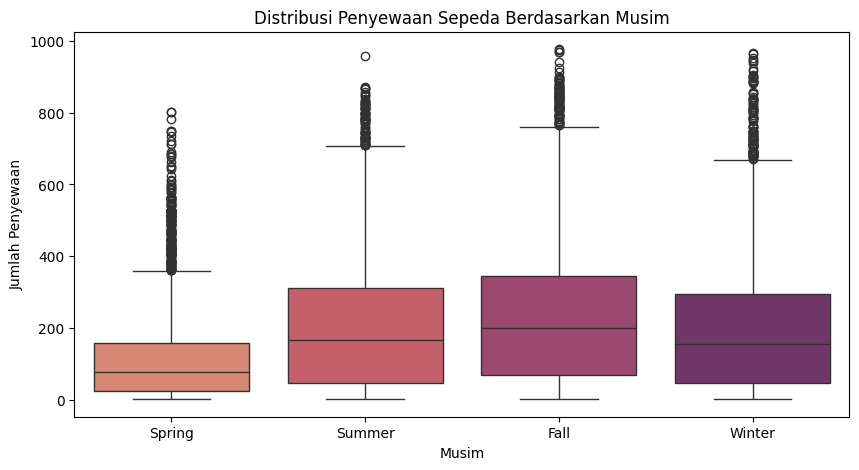

In [42]:
# Boxplot jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10,5))
sns.boxplot(x="season", y="cnt", data=hours_df, palette="flare", legend=False)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Berdasarkan visualisasi distribusi penyewaan sepeda berdasarkan musim dapat disimpulkan bahwa:

1. Distribusi penyewaan pada musim Gugur (Fall) dan musim Panas (Summer) memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan musim Semi(Spring) dan musim Dingin(Winter).
2. Musim Semi(Spring) memiliki jumlah penyewaan terendah dan memiliki banyak outliner.
3. Musim Gugur (Fall) memiliki median data yang tertinggi dari musim lain.
4. Terdapat banyak outliner di semua musim. Hal ini menunjukkan bahwa pada waktu tertentu terdapat lonjakan penyewaan yang jauh di atas rata-rata.

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\842066075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="weathersit", y="cnt", data=hours_df, palette="viridis")
C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\842066075.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["1", "2", "3", "4"])


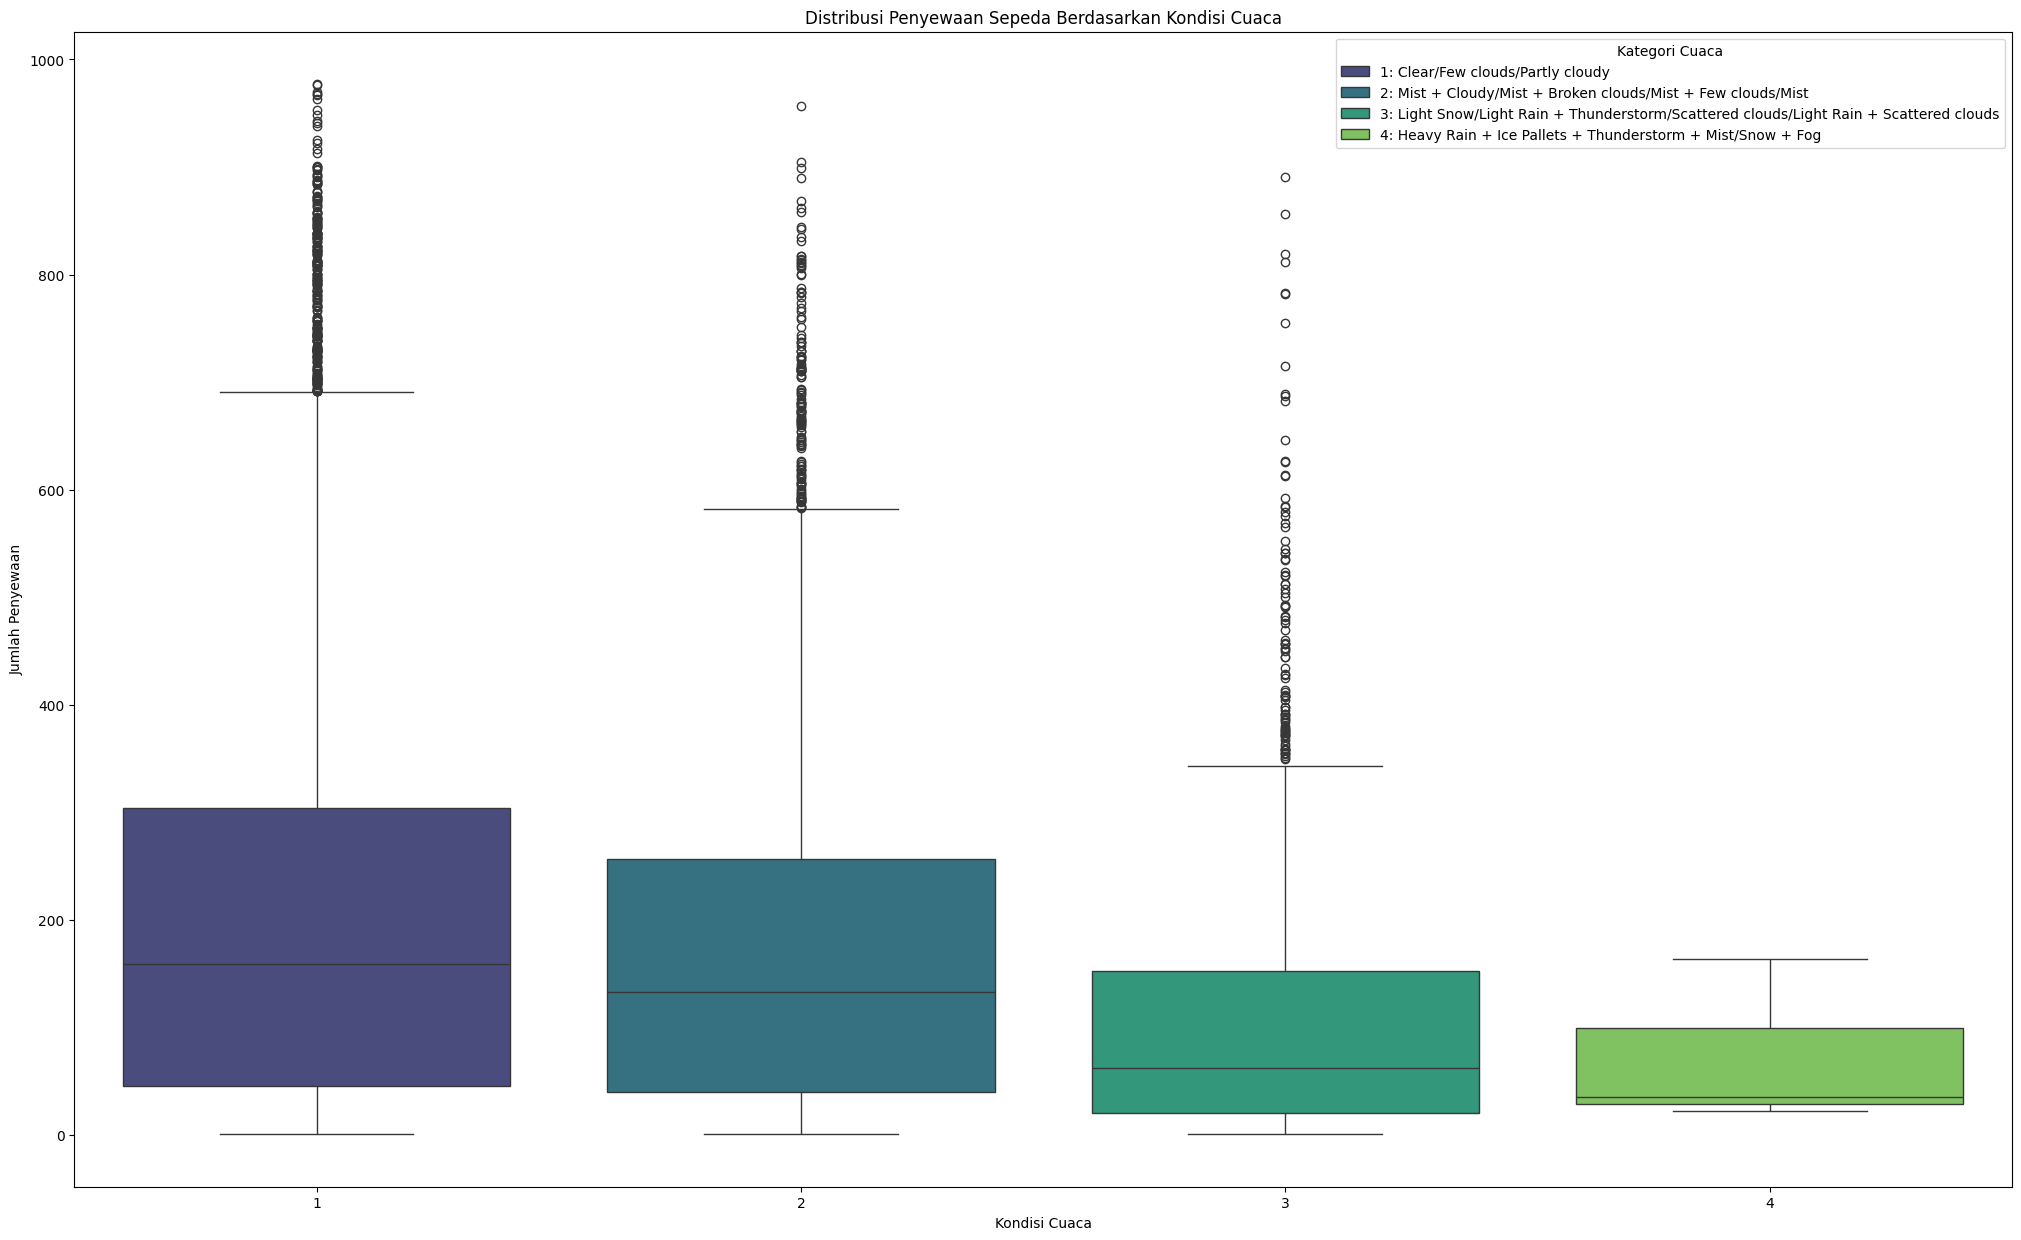

In [43]:
# Membuat boxplot jumlah penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(25,15))
ax = sns.boxplot(x="weathersit", y="cnt", data=hours_df, palette="viridis")

ax.set_xticklabels(["1", "2", "3", "4"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
legend_labels = [
    "1: Clear/Few clouds/Partly cloudy",
    "2: Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist",
    "3: Light Snow/Light Rain + Thunderstorm/Scattered clouds/Light Rain + Scattered clouds",
    "4: Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog"
]
plt.legend(handles=ax.patches[:4], labels=legend_labels, title="Kategori Cuaca", loc="upper right")
plt.show()

Berdasarkan visualisasi distribusi penyewaan sepeda berdasarkan kondisi cuaca dapat disimpulkan bahwa:

1. Kondisi cuaca 1 memiliki distribusi penyewaan tertinggi, dengan median yang paling tinggi juga. Hal ini menujukkan bahwa orang cenderung lebih banyak menyewa saat cuaca cerah.
2. Kondisi cuaca 2 memiliki distribusi penyewaan yang cukup tinggi walaupun tidak setinggi kondisi cuaca 1.
3. Kondisi cuaca 3 dan 4 memiliki distribusi penyewaan dan median yang rendah. Hal ini menunjukkan bahwa cuaca buruk secara signifikan dapat mengurangi jumlah penyewaan sepeda.
4. Terdapat banyak outlier pada kondisi 1, 2 dan 3 menunjukkan adanya lonjakan penyewaan sepeda.

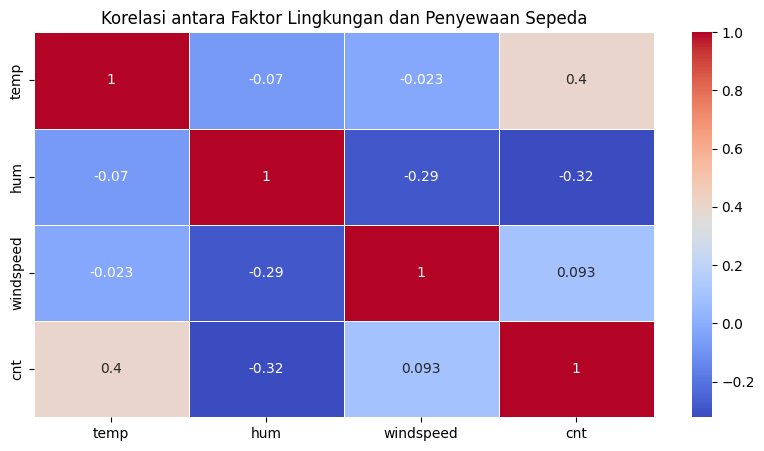

In [44]:
# Heatmap hubungan cuaca dengan jumlah penyewaan
plt.figure(figsize=(10,5))
sns.heatmap(hours_df[['temp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antara Faktor Lingkungan dan Penyewaan Sepeda")
plt.show()

Berdasarkan visualisasi korelasi antara faktor lingkungan dan penyewaan sepeda dapat disimpulkan bahwa:

1. **cnt(penyewaan sepeda)** dengan **temp(suhu)** berkorelasi positif sebesar **0.4** yang bersifat sedang(tidak terlalu kuat, tetapi berpengaruh). Hal ini menunjukkan bahwa semakin tinggi temperatur, semakin banyak orang yang menyewa sepeda.
2. **hum(kelembapan)** dengan **cnt(penyewaan sepeda)** berkorelasi negatif sebesar **-0.32**. Hal ini menunjukkan bahwa semakin tinggi kelembapan, semakin sedikit orang yang menyewa sepeda.
3. **cnt(penyewaan sepeda)** dengan **windspeed(kecepatan angin)** berkorelasi lemah sebesar **0.093**. Hal ini menunjukkan bahwa kecepatan angin tidak berpengaruh besar terhadap jumlah penyewaan sepeda.
4. **hum(kelembapan)** dengan **windspeed(kecepatan angin)** memiliki korelasi negatif sebesar **-0.29**. Hal ini menunjukkan bahwa kelembaban tinggi sering kali terjadi ketika angin bertiup lebih lambat.
5. **temp(suhu)** dengan **hum(kelembapan)** memiliki korelasi negatif lemah sebesar **-0.07**. Hal ini menunjukkan bahwa suhu yang lebih tinggi cenderung memiliki kelembaban yang sedikit lebih rendah, tetapi hubungan ini tidak terlalu kuat.

### Pertanyaan 2 : Bagaimana perbedaan pola penyewaan sepeda pada hari kerja, akhir pekan, dan hari libur?

C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\1566375094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="workingday", data=hours_df, palette="tab20b", ax=ax[0])
C:\Users\asus_\AppData\Local\Temp\ipykernel_31664\1566375094.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="holiday", data=hours_df, palette="tab20b", ax=ax[1])


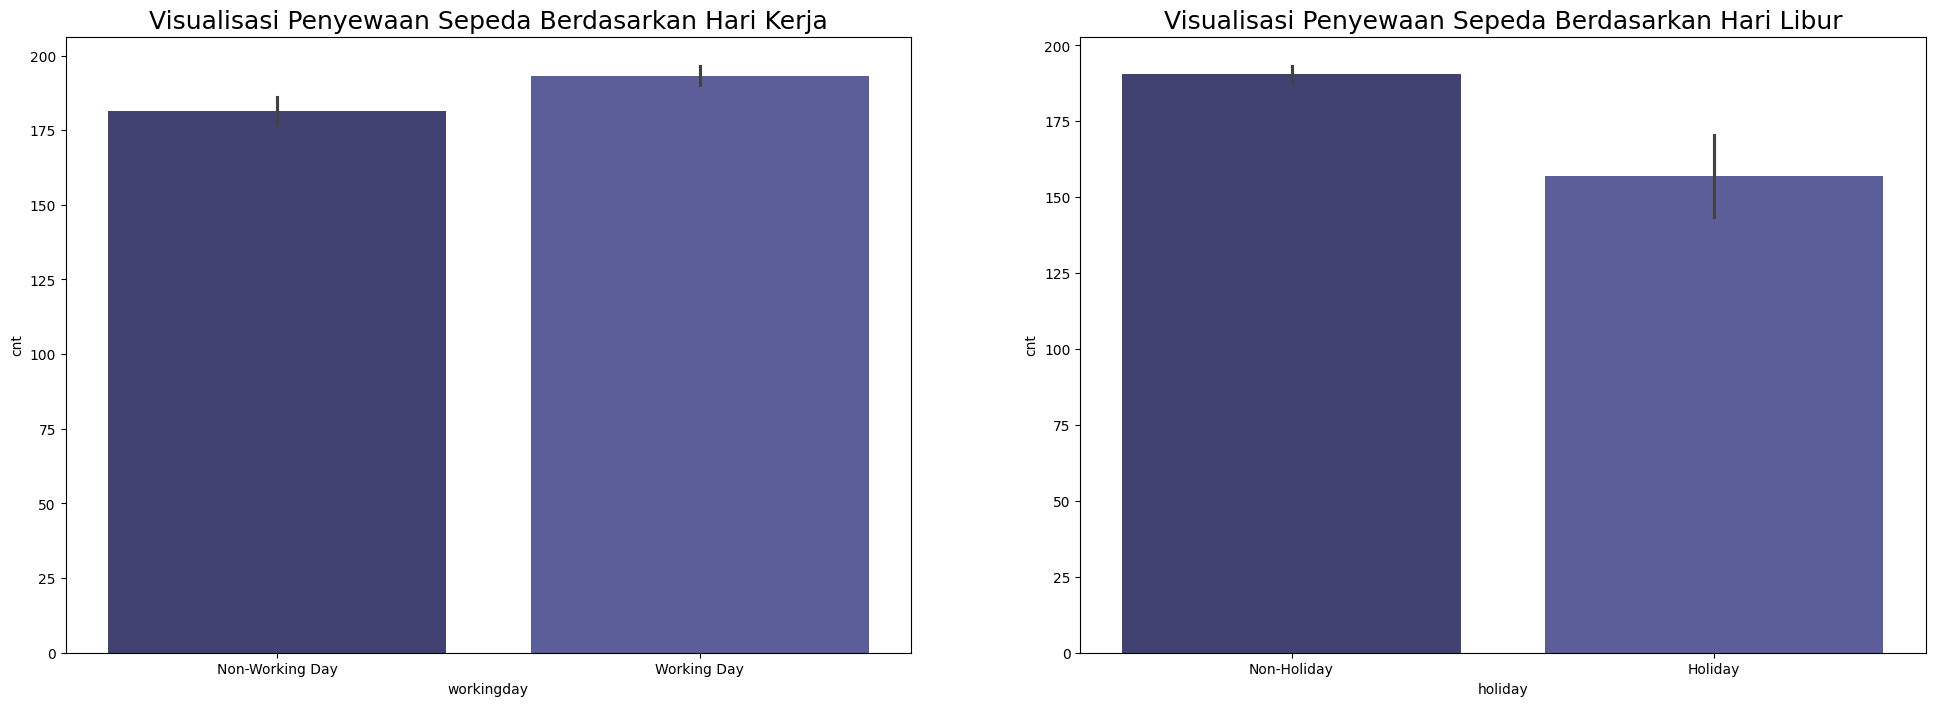

In [45]:
# Membandingkan jumlah penyewaan pada hari kerja, akhir pekan, dan hari libur
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
 
sns.barplot(y="cnt", x="workingday", data=hours_df, palette="tab20b", ax=ax[0])
ax[0].set_title("Visualisasi Penyewaan Sepeda Berdasarkan Hari Kerja", loc="center", fontsize=18)
 
sns.barplot(y="cnt", x="holiday", data=hours_df, palette="tab20b", ax=ax[1])
ax[1].set_title("Visualisasi Penyewaan Sepeda Berdasarkan Hari Libur", loc="center", fontsize=18)

plt.show()

Berdasarkan visualisasi di atas dapat disimpulkan bahwa:

1. Jumlah penyewaan sepeda lebih tinggi pada hari kerja (Working Day) dibandingkan hari tidak kerja (Non-Working Day).
2. Jumlah penyewaan sepeda lebih tinggi pada hari bukan libur (Non-Holiday) dibandingkan hari libur (Holiday).
3. Variabilitas data pada hari libur terlihat lebih tinggi, yang berarti jumlah penyewaan pada hari libur bisa sangat bervariasi tergantung pada faktor lain seperti cuaca dan hari dalam minggu.

### Pertanyaan 3 : Bagaimana tren penyewaan sepeda berdasarkan waktu dalam sehari? 

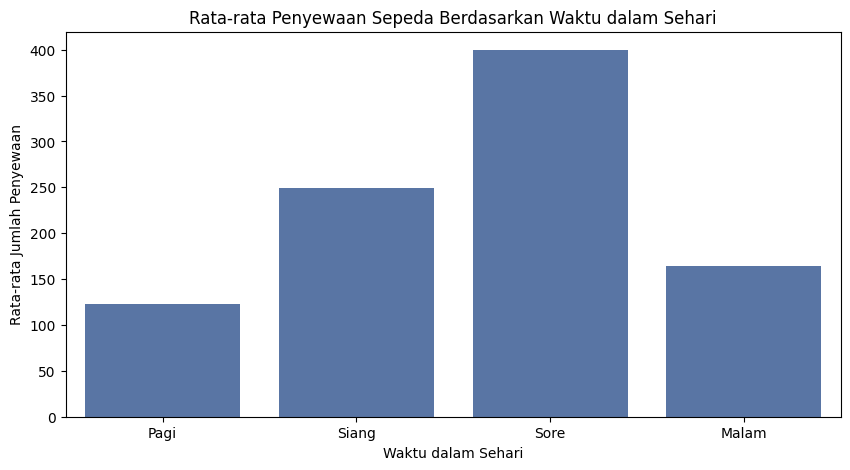

In [46]:
hours_df["hr"] = hours_df["hr"].str[:2].astype(int)

# Membuat kategori waktu dalam sehari
def categorize_hour(hr):
    if 1 <= hr < 12: 
        return "Pagi" # waktu pagi dimulai dari pukul 01.00 sampai dengan 11.00
    elif 12 <= hr < 16:
        return "Siang" # waktu siang dimulai dari pukul 12.00 sampai dengan 15.00
    elif 16 <= hr <= 18:
        return "Sore" # waktu sore dimulai dari pukul 16.00 sampai dengan 18.00
    else:
        return "Malam" # waktu malam dimulai dari pukul 19.00 sampai dengan 00.00

hours_df["time_of_day"] = hours_df["hr"].apply(categorize_hour)
time_of_day_counts = hours_df.groupby("time_of_day")["cnt"].mean().reindex(["Pagi", "Siang", "Sore", "Malam"])

# Visualisasi menggunakan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, color="#4C72B0")

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.xlabel("Waktu dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.show()

Berdasarkan visualisasi rata-rata penyewaan sepeda berdasarkan waktu dalam sehari, dapat disimpulkan bahwa:

1. Waktu sore mulai dari pukul 16:00 sampai dengan 18:00 merupakan waktu puncak penyewaan sepeda.
2. Waktu pagi mulai dari pukul 01:00 sampai dengan 11:00 memiliki jumlah penyewaan sepeda terendah.

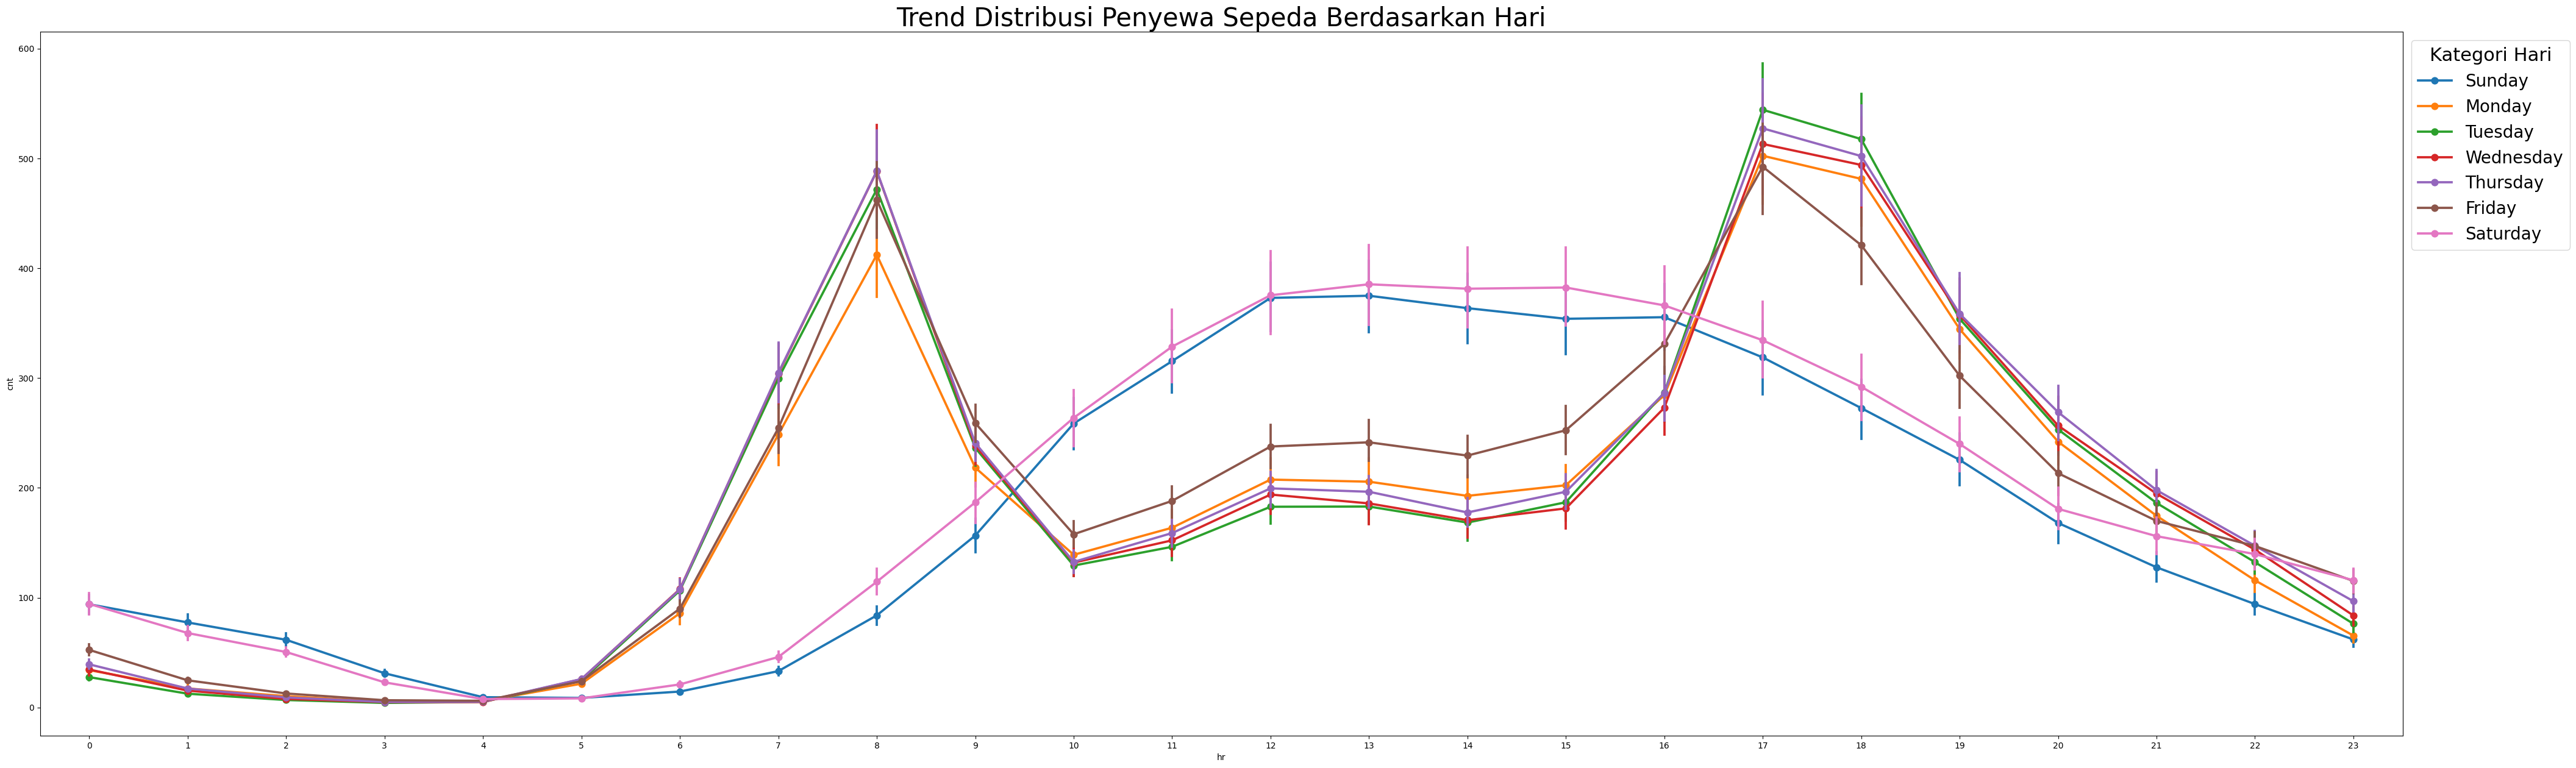

In [47]:
fig, ax = plt.subplots(figsize=(50,15))
sns.pointplot(
    data=hours_df, 
    x='hr', 
    y='cnt', 
    hue='weekday', 
    ax=ax
)

ax.set_title('Trend Distribusi Penyewa Sepeda Berdasarkan Hari', fontsize=30)
legend = ax.legend(title="Kategori Hari", fontsize=20, title_fontsize=22, loc='upper left', bbox_to_anchor=(1, 1))


Berdasarkan visualisasi trend distribusi penyewa sepeda berdasarkan hari, dapat disimpulkan bahwa:

1. Terdapat dua puncak utama dalam sehari yang berada di sekitar jam 08:00 dan 17:00. Hal ini menunjukkan bahwa penyewaan sepeda meningkat pada jam-jam sibuk, yang kemungkinan besar berhubungan dengan jam berangkat sekolah/kerja dan jam pulang sekolah/kerja.
2. Hari Senin(Monday) sampai dengan Jumat(Friday) menunjukkan pola yang lebih tajam dengan puncak yang lebih tinggi pada pagi dan sore hari.
3. Akhir pekan yaitu hari Sabtu(Saturday) dan Minggu(Sunday) memiliki pola yang relatif lebih rata dan tanpa lonjakan yang tajam.
4. Setelah jam 18:00, jumlah penyewaan sepeda menurun secara bertahap di semua hari. Hal ini menunjukkan bahwa aktivitas penyewaan sepeda pada malam hari lebih sedikit.

## Conclusion

### Pertanyaan 1 : Bagaimana pengaruh kondisi lingkungan dan musim terhadap jumlah penyewaan sepeda?

Berdasarkan proses analisis data, dapat disimpulkan bahwa terdapat pengaruh kondisi lingkungan dan musim terhadap jumlah penyewaan sepeda. Berikut beberapa pengaruh kondisi lingkungan dan musim terhadap jumlah penyewaan sepeda.

1. Pengaruh Musim terhadap Penyewaan Sepeda

    -  Distribusi penyewaan pada musim gugur (***Fall***) dan musim panas (***Summer***) memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan musim semi(***Spring***) dan musim dingin(***Winter***).
    - Musim semi(***Spring***) memiliki jumlah penyewaan terendah dan memiliki banyak outliner.
    - Musim dingin (***Winter***) memiliki penyewaan yang lebih rendah dibandingkan musim panas dan musim gugur, tetapi masih lebih tinggi dari musim semi.
    - Terdapat banyak outliner di semua musim. Hal ini menunjukkan bahwa pada waktu tertentu terdapat lonjakan penyewaan yang jauh di atas rata-rata.
    
    
2. Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda

    - Kondisi cuaca ***Clear/Few clouds/Partly cloudy*** memiliki distribusi penyewaan tertinggi, dengan median yang paling tinggi juga. Hal ini menujukkan bahwa orang cenderung lebih banyak menyewa saat cuaca cerah.
    - Kondisi cuaca ***Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist*** memiliki distribusi penyewaan yang cukup tinggi walaupun tidak setinggi kondisi cuaca 1.
    - Kondisi cuaca ***Light Snow/Light Rain + Thunderstorm/Scattered clouds/Light Rain + Scattered clouds*** dan ***Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog*** memiliki distribusi penyewaan dan median yang rendah. Hal ini menunjukkan bahwa cuaca buruk secara signifikan dapat mengurangi jumlah penyewaan sepeda.
    - Adanya lonjakan penyewaan sepeda yang jauh di atas rata-rata karena banyaknya  outlier pada kondisi:
        - ***Clear/Few clouds/Partly cloudy***, 
        - ***Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist***
        - ***Light Snow/Light Rain + Thunderstorm/Scattered clouds/Light Rain + Scattered clouds*** 


3. Pengaruh Kondisi Lingkungan terhadap Penyewaan Sepeda

    - **cnt(penyewaan sepeda)** dengan **temp(suhu)** berkorelasi positif sebesar **0.4** yang bersifat sedang(tidak terlalu kuat, tetapi berpengaruh). Hal ini menunjukkan bahwa semakin tinggi temperatur, semakin banyak orang yang menyewa sepeda.
    - **hum(kelembapan)** dengan **cnt(penyewaan sepeda)** berkorelasi negatif sebesar **-0.32**. Hal ini menunjukkan bahwa semakin tinggi kelembapan, semakin sedikit orang yang menyewa sepeda.
    - **cnt(penyewaan sepeda)** dengan **windspeed(kecepatan angin)** berkorelasi lemah sebesar **0.093**. Hal ini menunjukkan bahwa kecepatan angin tidak berpengaruh besar terhadap jumlah penyewaan sepeda.
    - **hum(kelembapan)** dengan **windspeed(kecepatan angin)** memiliki korelasi negatif sebesar **-0.29**. Hal ini menunjukkan bahwa kelembaban tinggi sering kali terjadi ketika angin bertiup lebih lambat.
    - **temp(suhu)** dengan **hum(kelembapan)** memiliki korelasi negatif lemah sebesar **-0.07**. Hal ini menunjukkan bahwa suhu yang lebih tinggi cenderung memiliki kelembaban yang sedikit lebih rendah, tetapi hubungan ini tidak terlalu kuat.


#### Kesimpulan Akhir
1. Musim sangat mempengaruhi jumlah penyewaan sepeda. Musim gugur dan musim panas adalah waktu puncak penyewaan sepeda.
2. Penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca, dengan penyewaan tertinggi terjadi pada hari dengan cuaca cerah dan menurun tajam saat cuaca memburuk.
3. Suhu adalah faktor lingkungan yang paling penting dalam mempengaruhi jumlah penyewaan sepeda. Kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil.


#### Saran dan Rekomendasi untuk Peningkatan Sistem Penyewaan Sepeda

1. Optimasi Persediaan Sepeda Berdasarkan Musim
    
    - Meningkatkan persediaan sepeda untuk memenuhi permintaan penyewa pada musim gugur dan musim panas karena permintaan yang tinggi.
    - Mengurangi persediaan sepeda pada musim semi dan dingin untuk menghindari kelebihan stok yang tidak digunakan.


2. Fleksibilitas Operasional
    - Rutin memantau prakiraan cuaca secara teratur untuk dapat disesuaikan dengan kegiatan operasional.
    - Pada hari-hari dengan cuaca buruk, pertimbangkan untuk mengurangi jam operasional, menawarkan layanan pengiriman sepeda, menyediakan jas hujan atau payung gratis untuk penyewa saat hujan ringan, dan menyediakan tempat parkir sepeda dengan atap pelindung agar sepeda tetap dalam kondisi baik meskipun cuaca buruk.


3. Strategi Pemasaran
    - Menawarkan diskon atau insentif pada musim semi, musim dingin, dan saat cuaca sedang tidak baik untuk mendorong pengguna tetap menggunakan sepeda.
    - Berikan informasi kepada pelanggan terkait kondisi cuaca, agar pelanggan dapat menyesuaikan waktu penyewaan sepeda.
    - Menaikkan harga sewa sepeda pada saat suhu udara tinggi, dan cuaca cerah karena permintaan yang tinggi.
    - Memberikan promo atau diskon 

4. Perawatan Sepeda
    - Rutin melakukan perawatan sepeda, terutama setelah digunakan dalam kondisi cuaca buruk.
    - Menyediakan sepeda sesuai dengan berbagai kondisi cuaca.

### Pertanyaan 2 : Bagaimana perbedaan pola penyewaan sepeda pada hari kerja, akhir pekan, dan hari libur?

Berdasarkan proses analisis data, dapat disimpulkan bahwa terdapat perbedaan pola penyewaan sepeda pada hari kerja, akhir pekan, dan hari libur yaitu sebagai berikut.

1. Jumlah penyewaan sepeda pada hari kerja (***Working Day***) lebih tinggi dibandingkan dengan akhir pekan (***Non-Working Day***). Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai moda transportasi harian ke suatu tempat, seperti tempat kerja, sekolah, dll.
2. Jumlah penyewaan sepeda pada hari libur (***Holiday***) lebih rendah dibandingkan dengan hari biasa (***Non-Holiday***). Hal ini menunjukkan bahwa pengguna cenderung tidak menggunakan sepeda untuk keperluan rekreasi sebanyak yang mereka gunakan untuk aktivitas sehari-hari seperti bekerja atau sekolah.


#### Faktor yang Mempengaruhi Pola Penyewaan Sepeda

1. Hari kerja: Lebih banyak orang menyewa sepeda untuk keperluan transportasi, terutama di pagi dan sore hari (jam sibuk).
2. Akhir pekan: Penyewaan menurun, kemungkinan karena masyarakat memiliki alternatif lain untuk transportasi atau lebih memilih kendaraan pribadi.
2. Hari libur: Jumlah penyewaan lebih rendah karena banyak tempat kerja dan sekolah tutup, sehingga kebutuhan transportasi menurun.


#### Rekomendasi dan Saran untuk Meningkatkan Penyewaan Sepeda

1. Meningkatkan Ketersediaan Sepeda pada Hari Kerja
    - Meningkatkan persedian sepeda pada hari kerja karena terdapat peningkatan permintaan yang tinggi oleh pengguna, khususnya pada jam-jam sibuk (pagi dan sore hari)

2. Promosi Akhir Pekan dan Hari Libur
    - Memberikan diskon atau tarif khusus untuk menarik lebih banyak pengguna.
    - Menawarkan paket penyewaan untuk keluarga atau kelompok dengan harga miring atau lebih murah.
    - Bekerja sama dengan tempat wisata lokal untuk menawarkan paket penyewaan sepeda yang menarik.
    - Menyelenggarakan acara bersepeda bersama atau tur sepeda berhadiah.

3. Peningkatan Layanan Penyewaan Sepeda
    - Menyediakan lokasi penyewaan sepeda di dekat kawasan pabrik, perkantoran, atau stasiun transportasi umum.
    - Menawarkan layanan tambahan seperti tempat penyimpanan helm atau barang bawaan.
    - Menyediakan lebih banyak sepeda di dekat taman atau tempat rekreasi pada akhir pekan dan hari libur.
    - Menyediakan rute bersepeda yang menarik dengan aplikasi atau peta panduan.

4. Perawatan Sepeda
    - Melakukan perawatan rutin terhadap sepeda, agar selalu dalam kondisi yang baik.
    - Menyediakan sepeda dengan jumlah yang cukup, agar tidak terjadi kehabisan sepeda pada saat jam-jam sibuk.

### Pertanyaan 3 : Bagaimana tren penyewaan sepeda berdasarkan waktu dalam sehari? 

Berdasarkan proses analisis data, dapat disimpulkan bahwa terdapat tren penyewaan sepeda berdasarkan waktu dalam sehari. Berikut tren penyewaan sepeda berdasarkan waktu dalam sehari:

1. Waktu sore setiap hari Senin sampai dengan Jumat mulai dari pukul 16:00 sampai dengan 18:00 merupakan waktu puncak penyewaan sepeda. Lonjakan lain terjadi pada pagi hari sekitar pukul 08:00 - 09:00.
2. Pada hari kerja (Senin-Jumat), puncak penyewaan cenderung lebih tinggi dan tajam dibandingkan akhir pekan (Sabtu-Minggu).
3. Penyewaan sepeda terendah terjadi setiap pukul 04:00 pagi.
4. Pada akhir pekan yaitu hari Sabtu dan Minggu pola penyewaan sepeda relatif lebih merata dan tidak memiliki lonjakan yang tajam.


#### Rekomendasi dan Saran untuk Meningkatkan Penyewaan Sepeda

1. Meningkatkan Ketersediaan Sepeda Berdasarkan Jam Sibuk
    - Meningkatkan persediaan jumlah sepeda di lokasi strategis pada pagi dan sore hari, khususnya di area perkantoran, sekolah, dan transportasi umum.
    - Mengurangi persediaan sepeda pada jam-jam sepi (dini hari dan malam) untuk menghemat biaya operasional.

2. Meningkatan Pelayanan & Infrastruktur
    - Meningkatkan infrastruktur penyewaan sepeda untuk mendukung kemudahan akses, misalnya dengan sistem pemesanan online atau pre-booking.
    - Meningkatkan jumlah stasiun pengisian daya jika terdapat sepeda listrik, terutama pada titik-titik dengan tingkat penyewaan tinggi.
    - Menyediakan lokasi penyewaan sepeda di dekat kawasan perkantoran, sekolah, atau stasiun transportasi umum.
    - Menawarkan layanan tambahan seperti tempat penyimpanan helm atau barang bawaan.

3. Optimalisasi Tarif Penyewaan
    - Menerapkan harga yang dinamis untuk meningkatkan penggunaan sepeda di jam sepi (misalnya diskon saat siang dan malam hari).
    - Memberikan diskon untuk pengguna yang menyewa di luar jam sibuk guna mendistribusikan penyewaan sepeda secara lebih merata.

4. Menyesuaikan Jam Operasional
    - Mempertimbangkan untuk memperpanjang jam operasional pada hari kerja, terutama pada jam-jam puncak.
    - Menyesuaikan jam operasional pada akhir pekan.

In [110]:
# days_df.to_csv("all_data.csv", index=False)
hours_df.to_csv("main_data.csv", index=False)